In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
ref=1025

In [8]:
x=linspace(0,1,ref) #this is exactly represented, good for precision (GPUs)

In [9]:
x

array([0.00000000e+00, 9.76562500e-04, 1.95312500e-03, ...,
       9.98046875e-01, 9.99023438e-01, 1.00000000e+00])

In [34]:
n=16
Pn=zeros((ref,n))

for i in range(n):
    Pn[:,i] = x**i

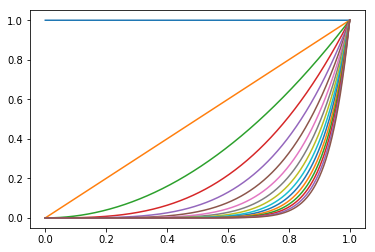

In [35]:
_=plot(x,Pn)

In [32]:
#I wan to plot p=1+x+2x^2+3x^3+4x^5 (I have n points, n=6)

In [36]:
Pn.dot([1,1,2,3,0,4])
p = Pn.dot([1,-1,3,-3,0,0])

ValueError: shapes (1025,16) and (6,) not aligned: 16 (dim 1) != 6 (dim 0)

In [1]:
#plot(x,p)

In [38]:
#Let us compute the matrix A
q=linspace(0,1,n)

A=zeros((n,n))
for i in range(n):
        A[:,i] = q**i

In [39]:
def runge(x):
    return 1./(1+50*(x-.5)**2)

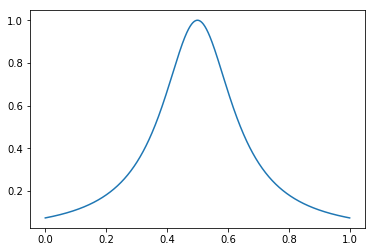

In [27]:
plot(x,runge(x))

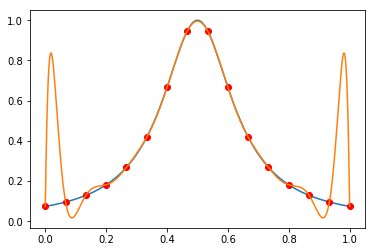

In [40]:
G = runge(q)


p = linalg.solve(A,G) #same as Ainv=linalg.solve(A)-->but this scales as N^4
plot(x,runge(x))
plot(q,runge(q),'ro')
plot(x,Pn.dot(p))

In [83]:
lebesgue = sum(abs(Pn),axis=1)
lebesgue.shape

(1025,)

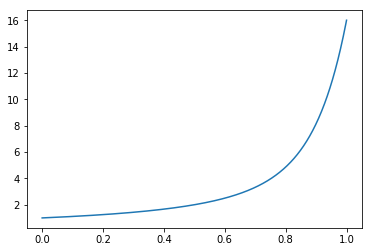

In [84]:
plot(x,lebesgue)

In [85]:
linalg.cond(A)

3121657049605.7983

In [93]:
#Let us try to construct lagrange basis given q
#Ln = array([(x-q[i])/(q[j]-q[i])])

n=5
q = linspace(0,1,n)
Ln=zeros((ref,n))

def compute_lagrange_basis(x,q):
    ref=len(x)
    n=len(q)
    Ln = ones((ref,n))
    for i in range(n):
        for j in range(n):
            if j != i:
                Ln[:,i] *= (x-q[j])/(q[i]-q[j])
    return Ln

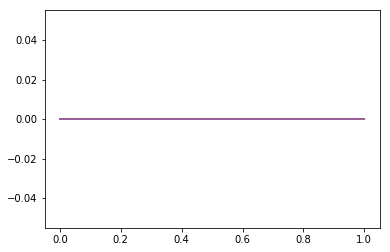

In [94]:
_ = plot(x,Ln)

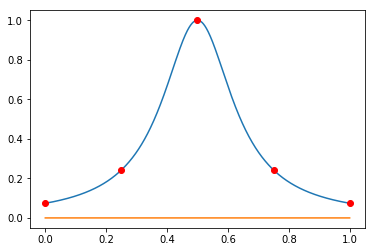

In [88]:
plot(x,runge(x))
plot(x,Ln.dot(runge(q)))
plot(q,runge(q),'ro')

In [95]:
def interpolation(x,q,f): #x=points in which I want to compute interpolation, q=points in which I interpolate,
    """Evaluate the polynomial interpolation "p" 
    of f at the points x such that f(q[i]) = p(q[i])"""
    ref=len(x)
    n=len(q)
    Ln = compute_lagrange_basis(x,q)
    return Ln.dot(f(q))
    

In [82]:
#q = linspace(0,1,8)


#plot(x,runge(x))
#plot(x,p)
#plot(q,runge(q),'ro')

for n in range(5,10):
    q = linspace(0,1,n)
    p = interpolation(x,q,runge)
    
    plot(x,p)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in multiply
  from ipykernel import kernelapp as app
/usr/lib/python3/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


ValueError: shapes (1025,1025) and (5,) not aligned: 1025 (dim 1) != 5 (dim 0)

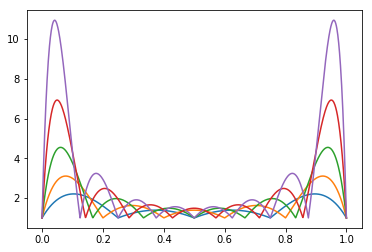

In [96]:
def compute_lebesgue_function(x,q):
    Ln = compute_lagrange_basis(x,q)
    return sum(abs(Ln),axis=1)

for i in range(5,10):
    plot(x,compute_lebesgue_function(x,linspace(0,1,i)))
    
#MACRO --> you cannot call it as a standalone function
def cost_function(q):
    """Assume x is defined globally.
    Compute lebesgue function associated to q, and return its maximum
    on the points x"""
    return (max(compute_lebesgue_function(x,q)))

In [97]:
import scipy
import scipy.optimize

q = linspace(0,1,5)

qopt = scipy.optimize.minimize(cost_function,q)

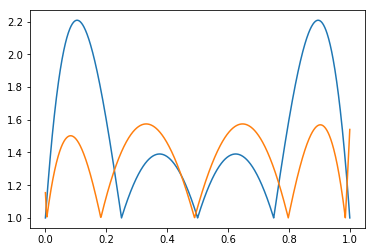

In [99]:
plot(x,compute_lebesgue_function(x,q))
plot(x,compute_lebesgue_function(x,qopt.x))

KeyError: 1

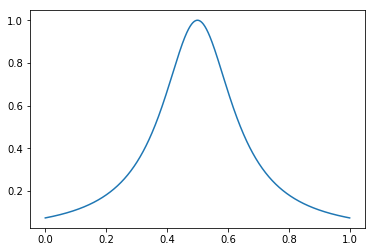

In [101]:
plot(x,runge(x))
plot(x,interpolation(x,qopt,runge)) #almost as good as Chebyshev
plot(qopt,runge(qopt),'ro')

plot(qopt,runge(qopt),'ro')
plot(q,runge(q),'go')